In [1]:
import pandas as pd

data = pd.read_json("Indian_Number_plates.json", lines=True)
data.head()

,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN


In [2]:
# delete the extras column
del data['extras']
# check the data dataframe
data.head()

,content,annotation
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi..."
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi..."
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi..."
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi..."
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi..."


In [3]:
#Checking out annotation structure
data['annotation'][0]

[{'label': ['number_plate'],
  'notes': '',
  'points': [{'x': 0.722084367245657, 'y': 0.5879828326180251},
   {'x': 0.8684863523573201, 'y': 0.688841201716738}],
  'imageWidth': 806,
  'imageHeight': 466}]

In [4]:
# Extract the points of the bounding boxes
data['points'] = data.apply(lambda row: row['annotation'][0]['points'], axis=1)
data['height'] = data.apply(lambda row: row['annotation'][0]['imageHeight'], axis=1)
data['width'] = data.apply(lambda row: row['annotation'][0]['imageWidth'], axis=1)
# And drop the rest of the annotation info
del data['annotation']

data.head()

,content,points,height,width
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'x': 0.722084367245657, 'y': 0.5879828326180...",466,806
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'x': 0.16194331983805602, 'y': 0.85077951002...",449,494
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'x': 0.082, 'y': 0.697452229299363}, {'x': 0...",314,500
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'x': 0.434, 'y': 0.667377398720682}, {'x': 0...",469,500
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'x': 0.20879120879120802, 'y': 0.39076376554...",563,1001


In [5]:
data['xmin'] = data.apply(lambda row: row['points'][0]['x'], axis=1)
data['ymin'] = data.apply(lambda row: row['points'][0]['y'], axis=1)
data['xmax'] = data.apply(lambda row: row['points'][1]['x'], axis=1)
data['ymax'] = data.apply(lambda row: row['points'][1]['y'], axis=1)
del data['content']
del data['points']

In [6]:
data.head()

,height,width,xmin,ymin,xmax,ymax
0,466,806,0.722084,0.587983,0.868486,0.688841
1,449,494,0.161943,0.850780,0.582996,1.000000
2,314,500,0.082000,0.697452,0.230000,0.828025
3,469,500,0.434000,0.667377,0.718000,0.765458
4,563,1001,0.208791,0.390764,0.865135,0.984014


In [7]:
images_path = 'Data-Images/Cars/'  
data['filename']=[images_path+str(i) + '.jpg' for i in list(range(0, 237))]
data.head()

,height,width,xmin,ymin,xmax,ymax,filename
0,466,806,0.722084,0.587983,0.868486,0.688841,Data-Images/Cars/0.jpg
1,449,494,0.161943,0.850780,0.582996,1.000000,Data-Images/Cars/1.jpg
2,314,500,0.082000,0.697452,0.230000,0.828025,Data-Images/Cars/2.jpg
3,469,500,0.434000,0.667377,0.718000,0.765458,Data-Images/Cars/3.jpg
4,563,1001,0.208791,0.390764,0.865135,0.984014,Data-Images/Cars/4.jpg


In [8]:
modified_df = pd.DataFrame()
modified_df['filename'] = data['filename']
modified_df['width'] = data['width']
modified_df['height'] = data['height']
modified_df['class'] = 'license_plate'
modified_df['xmin'] = data['xmin']
modified_df['ymin'] = data['ymin']
modified_df['xmax'] = data['xmax']
modified_df['ymax'] = data['ymax']

modified_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Data-Images/Cars/0.jpg,806,466,license_plate,0.722084,0.587983,0.868486,0.688841
1,Data-Images/Cars/1.jpg,494,449,license_plate,0.161943,0.850780,0.582996,1.000000
2,Data-Images/Cars/2.jpg,500,314,license_plate,0.082000,0.697452,0.230000,0.828025
3,Data-Images/Cars/3.jpg,500,469,license_plate,0.434000,0.667377,0.718000,0.765458
4,Data-Images/Cars/4.jpg,1001,563,license_plate,0.208791,0.390764,0.865135,0.984014


In [9]:
modified_df.shape

(237, 8)

In [10]:
#convert to pascal-voc format
x_top = []
y_top = []
x_bot = []
y_bot = []
for i in range(237):
    xtop = int(modified_df.iloc[i,1]*modified_df.iloc[i,4])
    x_top.append(xtop)
    ytop = int(modified_df.iloc[i,2]*modified_df.iloc[i,5])
    y_top.append(ytop)
    xbot = int(modified_df.iloc[i,1]*modified_df.iloc[i,6])
    x_bot.append(xbot)
    ybot = int(modified_df.iloc[i,2]*modified_df.iloc[i,7])
    y_bot.append(ybot)
    

In [11]:
modified_df['x_top'] = x_top
modified_df['y_top'] = y_top
modified_df['x_bot'] = x_bot
modified_df['y_bot'] = y_bot

modified_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,x_top,y_top,x_bot,y_bot
0,Data-Images/Cars/0.jpg,806,466,license_plate,0.722084,0.587983,0.868486,0.688841,581,273,700,320
1,Data-Images/Cars/1.jpg,494,449,license_plate,0.161943,0.850780,0.582996,1.000000,79,381,288,449
2,Data-Images/Cars/2.jpg,500,314,license_plate,0.082000,0.697452,0.230000,0.828025,41,219,115,259
3,Data-Images/Cars/3.jpg,500,469,license_plate,0.434000,0.667377,0.718000,0.765458,217,312,359,359
4,Data-Images/Cars/4.jpg,1001,563,license_plate,0.208791,0.390764,0.865135,0.984014,208,219,865,553


In [12]:
del modified_df['xmin'],modified_df['ymin'],modified_df['xmax'],modified_df['ymax']
modified_df.head()

,filename,width,height,class,x_top,y_top,x_bot,y_bot
0,Data-Images/Cars/0.jpg,806,466,license_plate,581,273,700,320
1,Data-Images/Cars/1.jpg,494,449,license_plate,79,381,288,449
2,Data-Images/Cars/2.jpg,500,314,license_plate,41,219,115,259
3,Data-Images/Cars/3.jpg,500,469,license_plate,217,312,359,359
4,Data-Images/Cars/4.jpg,1001,563,license_plate,208,219,865,553


In [13]:
modified_df.to_csv('NumberPlate.csv')

In [14]:
# 90% for train
train = modified_df.sample(frac=0.90)
modified_df.drop(train.index, axis=0, inplace=True)

# 10% for test
test = modified_df

In [15]:
train.shape

(213, 8)

In [16]:
test.shape

(24, 8)

In [17]:
train.head()

,filename,width,height,class,x_top,y_top,x_bot,y_bot
158,Data-Images/Cars/158.jpg,500,537,license_plate,83,33,369,482
87,Data-Images/Cars/87.jpg,1800,1200,license_plate,784,651,1079,742
136,Data-Images/Cars/136.jpg,500,332,license_plate,155,200,328,274
11,Data-Images/Cars/11.jpg,1024,769,license_plate,348,377,499,436
19,Data-Images/Cars/19.jpg,919,532,license_plate,261,189,741,392


In [18]:
test.head()

,filename,width,height,class,x_top,y_top,x_bot,y_bot
8,Data-Images/Cars/8.jpg,1569,1119,license_plate,644,507,892,578
21,Data-Images/Cars/21.jpg,802,615,license_plate,272,2,510,65
24,Data-Images/Cars/24.jpg,600,361,license_plate,162,197,430,277
31,Data-Images/Cars/31.jpg,1000,562,license_plate,450,277,568,355
32,Data-Images/Cars/32.jpg,610,485,license_plate,112,238,281,313


In [19]:
train.to_csv('train.csv')

In [20]:
test.to_csv('test.csv')

# A random manual check of the bounding box

In [21]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('IndianPlates/Data-Images/Cars/5.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [22]:
image.shape

(431, 416, 3)

In [25]:
# 581	273	700	320
#105	279	260	335


cv2.rectangle(image, (105,279), (260,335), (255,0,0), 2)
cv2.imwrite('rectangle_5.png', image)

True

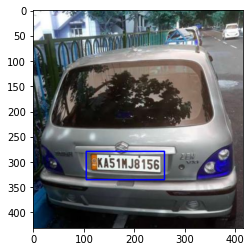

In [27]:
image = plt.imread('rectangle_5.png')
plt.imshow(image)
plt.show()